<a href="https://colab.research.google.com/github/KHUSH445/ML_LAB/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [ ]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


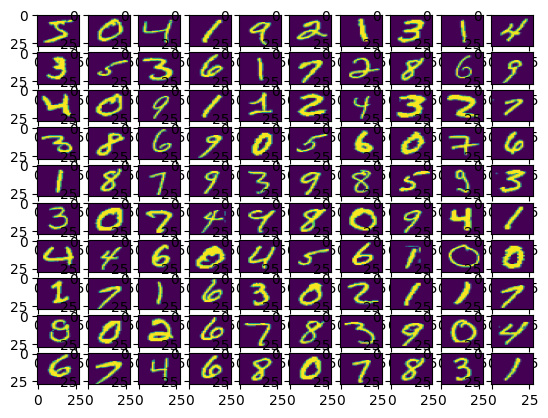

In [ ]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28),
                        aspect='auto')
        k += 1
plt.show()

In [ ]:
model = Sequential([

    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),

      # dense layer 1
    Dense(256, activation='sigmoid'),

    # dense layer 2
    Dense(128, activation='sigmoid'),

      # output layer
    Dense(10, activation='sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10,
          batch_size=2000,
          validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.2281 - loss: 2.2824 - val_accuracy: 0.5343 - val_loss: 1.8352
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6770 - loss: 1.6690 - val_accuracy: 0.8157 - val_loss: 1.1424
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8103 - loss: 1.0396 - val_accuracy: 0.8614 - val_loss: 0.7204
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8564 - loss: 0.6939 - val_accuracy: 0.8872 - val_loss: 0.5232
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8828 - loss: 0.5216 - val_accuracy: 0.8983 - val_loss: 0.4250
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8953 - loss: 0.4318 - val_accuracy: 0.9073 - val_loss: 0.3689
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9032 - loss: 0.3792 - val_accuracy: 0.9126 - val_loss: 0.3320
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9106 - loss: 0.3404 - val_accuracy: 0.9174 - v

In [ ]:
results = model.evaluate(x_test,  y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [2.5908586978912354, 0.11349999904632568]


Deep Neural Network (DNN) on the MNIST dataset.

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input

deep_model = models.Sequential([
    Input(shape=(784,)), # Use Input layer to specify input shape
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

In [ ]:
deep_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # integer labels for classification
    metrics=['accuracy']
)

In [ ]:
# Flatten the input data
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

print("Flattened feature matrix:", x_train_flattened.shape)
print("Flattened target matrix:", x_test_flattened.shape)

Flattened feature matrix: (60000, 784)
Flattened target matrix: (10000, 784)


In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input

# Re-define the deep_model
deep_model = models.Sequential([
    Input(shape=(784,)), # Use Input layer to specify input shape
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Re-compile the deep_model
deep_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # integer labels for classification
    metrics=['accuracy']
)

# Train the re-compiled model with flattened data
history = deep_model.fit(
    x_train_flattened, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_flattened, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8535 - loss: 0.4845 - val_accuracy: 0.9655 - val_loss: 0.1113
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9749 - loss: 0.0857 - val_accuracy: 0.9730 - val_loss: 0.0835
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9825 - loss: 0.0560 - val_accuracy: 0.9787 - val_loss: 0.0744
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9870 - loss: 0.0395 - val_accuracy: 0.9777 - val_loss: 0.0746
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9800 - val_loss: 0.0673
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 0.9795 - val_loss: 0.0738
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9928 - loss: 0.0222 - val_accuracy: 0.9786 - val_loss: 0.0816
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9943 - loss: 0.0173 - val_acc

In [ ]:
test_loss, test_acc = deep_model.evaluate(x_test_flattened, y_test)
print(f" Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9794 - loss: 0.0866
 Test Accuracy: 98.18%


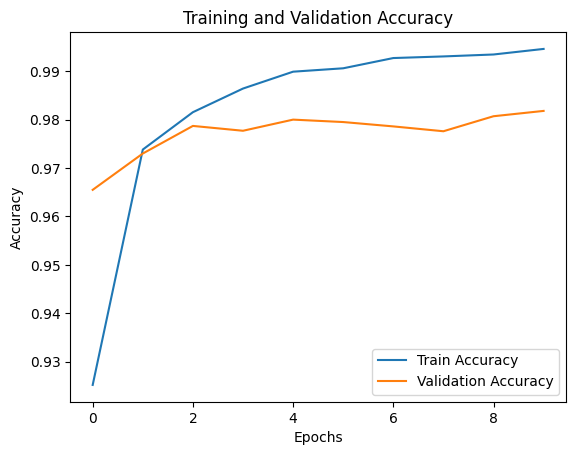

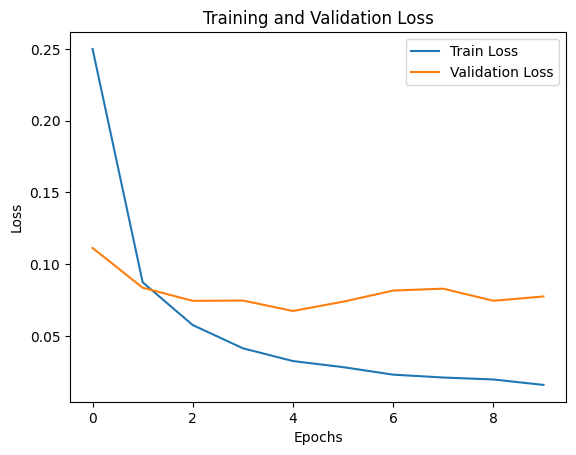

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


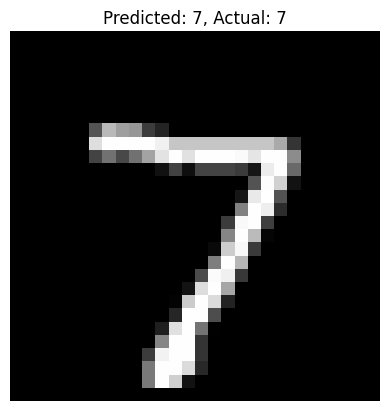

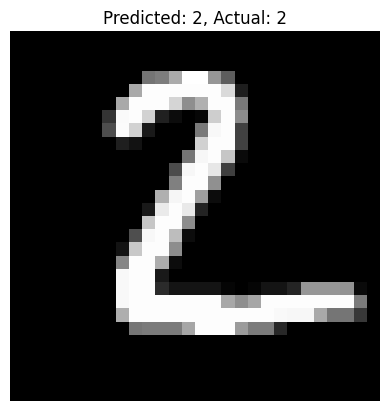

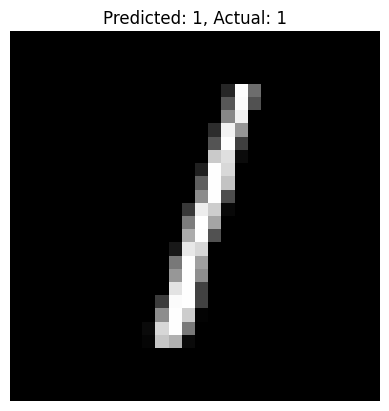

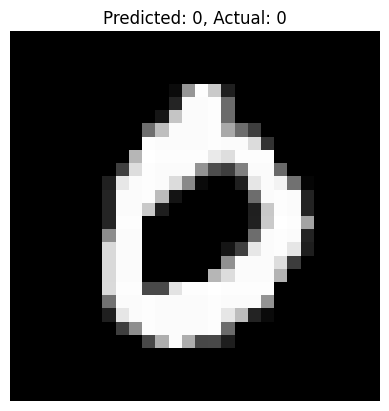

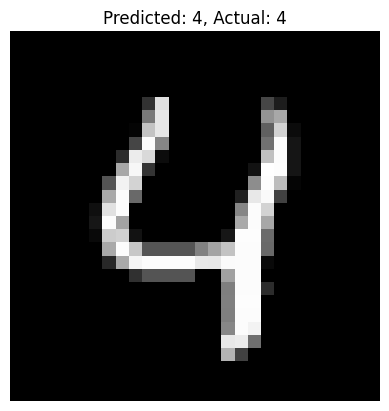

In [ ]:
import numpy as np

predictions = deep_model.predict(x_test_flattened[:5])

for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()